### What is Machine Learning? 
What do we really mean when we talk about a term like "Machine Learning"? Your intuition is correct when you think that it simply means to make a machine "learn". But how exactly are you supposed to make a machine learn? The software engineers amongst us might say the first and simplest way is that you program in the steps and/or decisions for whatever given task you need to accomplish. A brute force approach like that works when when you need a button on a website to do something different given 1 of a possible of 5 options, but what do you do when you have to make a machine play chess <em>and</em> play it well? A chess player has 400 possible positions after the first move, 72000+ positions after the second, 9 million+ after the third, and a staggering 288 billion+ positions after the fourth. <em>How</em> do you program in decisions to account for all <em>that</em>?

Let's take another example, like predicting income? Given inputs of age, past income, experience, and education, can you make a machine accurately predict (with an understandable degree of error) salaries given different combinations of these inputs? Sounds difficult. But Math can be our friend here. Call it Data Science, or Statistical Learning, or Machine Learning, but we're going to use computer science and math to do just that.

### What kind of events can be predicted?
What is the key commanality between events which can be predicted? They have a type of regularity associated with them. They certainly dont have to be linear, but they exhibit a pattern. You cannot predict random events because by definition they are random&mdash;they dont follow any kind of regular pattern. There are innumerable patterns which exist in the natural world around us and there are innumerable more which humans create themselves.

#### Functions
A pattern comes from a function. We know functions to be input-output machines. You put in some kind of an input and it transforms it into an output. All patterns and regular events have a basis in some form of function. Here are some examples naturally occuring functions:


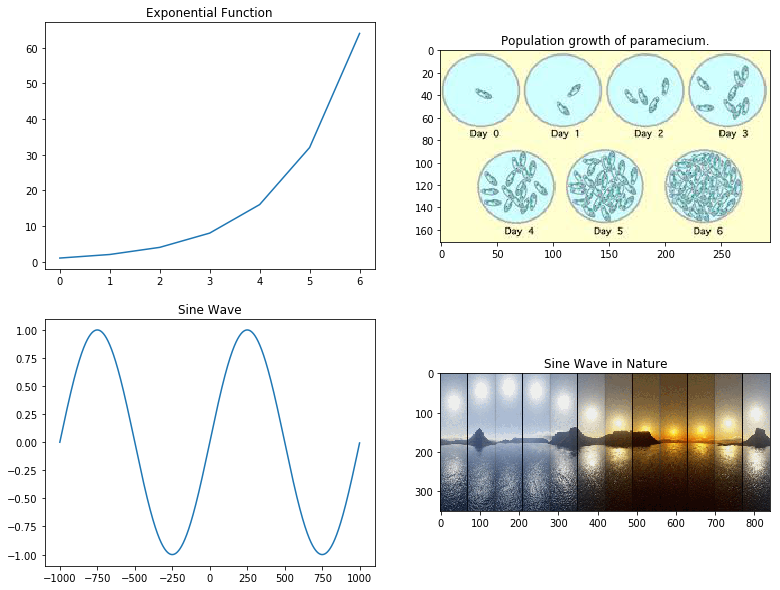

In [22]:
#Importing the libraries required for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
#Creating a function to generate a sine wave
def sine_wave(frequency, time_length):
    wave = [np.sin(2*np.pi*frequency * (i/time_length)) for i in range(time_length)]
    return wave

#Creating a few arrays
x = np.arange(0,7,1)
sin_x = np.arange(-1000,1000,1)
sine_w = sine_wave(2,2000)

#Loading in images
paramecium_exponential = imread("paramecium_multiplication.jpg")
sine_wave_image = imread("sun_sine_wave.gif")

#Plot
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharey=False)
f.set_size_inches(h=10,w=13)
ax1.plot(x,[2**i for i in x])
ax1.set_title("Exponential Function")
ax2.imshow(paramecium_exponential)
ax2.set_title("Population growth of paramecium.")
ax3.plot(sin_x,sine_w)
ax3.set_title("Sine Wave")
ax4.imshow(sine_wave_image, animated=True)
ax4.set_title("Sine Wave in Nature")
plt.show()

Machine Learning, in this respect, is using a learning algorithm to best estimate a function behind a certain pattern. It is the ability of a computer to learn and act without being explicitly programmed. Here's a more formal definition of Machine Learning:

```
A computer program is said to learn from experience E with respect to some task T and some performance measure  P, if its performance on T, as measured by P, improves with experience E.

— Tom Mitchell (1998)
```

This might make sense to you or it might not. We'll break this down going ahead.

In [23]:
#Importing the libraries required for the analysis
import pandas as pd
import numpy as np

#Loading in a dataset
advertising = pd.read_csv("data/Advertising.csv")

#Looking at the first five rows of data
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


This is a pretty famous dataset used for teaching statistical analysis. This data consists of sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different types of media: TV, radio, and newspaper. (I'm sure you're wondering$mdash; radio!? What about the internet? This is an old....old dataset). It isnt possible to directly increase the sale of the product, however, it is possible to control the advertising expenditure in each of the three media. If we are able to determine if there is an association between adveritising and sale (and further more, advertising on what kind of media), then we can figure out a model to increase the sale of the product. 

Let's think about this relationship a bit. The dataset displays sales&mdash;<em>in thousands of units</em>&mdash;as a function of TV, Radio, and Newspaper advertising budgets&mdash;in thousands of dollars. We can also express this as:

$$SALES = FUNCTION(ADVERTISING \ BUDGET) + \epsilon$$

So for us to be able to successfully predict what the impact of different media budgets will be on the sales of the product, we will have to estimate <b>how many products are sold for every dollar spent in each of the advertising budgets.</b> In this formulation the function represents the systematic information that the advertising budget provides about the sales.

Let's write this as:

$$Y_{sales} = W_{tv}X_{tv} + W_{radio}X_{radio} + W_{newspaper}X_{newspaper} + \epsilon$$

Here,<br>
$W_i$ represents the number of products sold for every dollar of advertising budget in that domain<br>
$X_i$ represents the advertising budget for that form of media<br>
$\epsilon$ represents the irreducable error term&mdash;signifies the amount of the sales which cannot be attributed to the advertising budget

Let's think of something even a bit more simpler and closer to day-to-day life. Let's say you go to the grocery store and get five bananas, an apple and three oranges and it cost you twenty-six dollars:

$$5B + 1A + 3O = 26$$

You dont know how much each fruit costs individually, but you know how many you bought and how much you ended up paying at the end of it. Now, you go to the grocers again the following two days and this time you get the following combinations:

$$3B + 3A + 1O = 26$$

$$10B + 7A + 3O = 71$$

We can see that this represents a system of linear equations with three variables. You can easily solve this to get the price of one fruit. An apple costs \$5, a banana costs \$3 and an orange costs \$2. This is quite similar to our problem with the advertising budget. We have how much we're <em>spending</em> on the advertising for each form of media, we have our <em>total</em> units of sale, we need to figure out what is the <em>cost</em> we're incurring in our three advertising budgets for every unit sold. 

There is one critical difference between our advertising budget example and our grocery store example. The results drawn from our advertising budget are not <em>just</em> dependent on the advertising budget and hence are not static. The same amount of budget as the previous year will not give you the exact same sales results the next year. The results have a lot more variance than our grocery store example which (from our perspective) is only dependent on the price of the fruit at that time. 

Let's imagine that the price of the fruit also varies on a day to day basis. Now our aim shifts a little bit. We no longer want the exact price of the fruit but rather the average price of each fruit. We also want to understand the trend behind the shifting prices and use the function underneath the trend to generalize our predictions for how much money will we end up spending when we go shopping next. We can also analyze the function behind the trend to figure out when can we expect which fruit price to be higher than average or lower than average. 

We carry this same idea forward to the advertising budget example where our aim is to estimate the function which helps us best predict the number of units which will be sold given what kind of advertising budgets we have. And we estimate this function by having the machine look at a lot of data based on this relationship.

### Independent and Dependent Variables
Looking at the advertising budget example, we can see that the number of units sold is a function of the advertising budget of each form of media. In this case, the budgets of the three different forms of media are input variables (variables which go into the function) and the number of units sold is our output variable (variable which comes out of the funtion). The input variables are also known as the <b>independent variables</b> or the <b>predictor variables</b> or <b>features</b> while the <b>output variable</b> is also known as the <b>response variable</b> or the <b>dependent variable</b>.

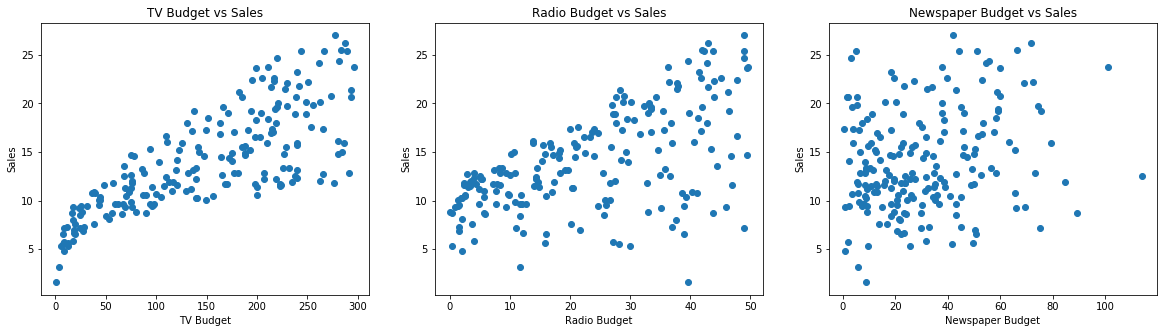

In [24]:
#Plot
from mpl_toolkits.mplot3d import Axes3D

f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=False)
f.set_size_inches(h=5,w=20)
ax1.scatter(advertising['TV'],advertising['sales'])
ax1.set_title("TV Budget vs Sales")
ax1.set_xlabel("TV Budget")
ax1.set_ylabel("Sales")
ax2.scatter(advertising['radio'],advertising['sales'])
ax2.set_title("Radio Budget vs Sales")
ax2.set_xlabel("Radio Budget")
ax2.set_ylabel("Sales")
ax3.scatter(advertising['newspaper'],advertising['sales'])
ax3.set_title("Newspaper Budget vs Sales")
ax3.set_xlabel("Newspaper Budget")
ax3.set_ylabel("Sales")
plt.show()


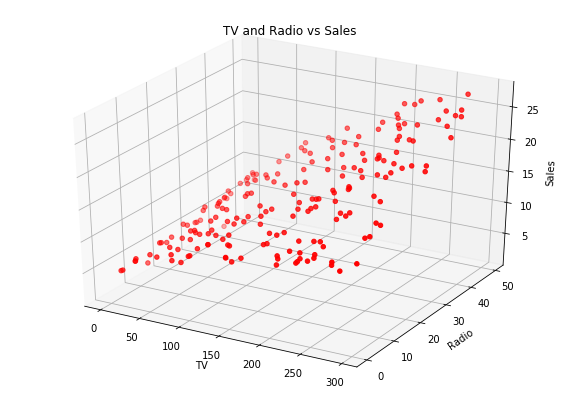

In [25]:
#Let's do a plot to show sales as a function of two input variables in the same plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(advertising['TV'], advertising['radio'], advertising['sales'], c='r', marker='o')
ax.set_xlabel("TV");ax.set_ylabel("Radio");ax.set_zlabel("Sales")
ax.set_title("TV and Radio vs Sales")
plt.show()

From the scatter plots above, we can tell that:
- The TV adveritising budget has a very strong positive linear relationship with the product sales.
- Radio advertising budget also has a positive linear relationship with the product sales, though less than the relationship with the TV budget.
- The newspaper adveritising budget seems to have a somewhat scattered relationship with the sale of the product.

Looking at the first and second plot, we might feel that we can predict the sales using the advertising budget on television and radio. However, the function $f$ that connects the input variables to the output variable is unknown. In this situation one must estimate $f$ based on the observed points.

There are two main reasons why we may want to estimate $f$:
- Prediction
- Inference

### Prediction
In many situations, a set of inputs $X$ are readily available, but the output $Y$ cannot be easily obtained. In this setting, since the error term averages to zero, we can predict $Y$ using:
$$\hat{Y} = \hat{f}(X)$$
where $\hat{f}$ represents our estimate for $f$, and $\hat{Y}$ represents the resulting prediction for $Y$.

In this setting, $\hat{f}$ is often treated as a <em>black box</em>, in the sense that one is not typically concerned with the exact form of $\hat{f}$, provided that it yields accurate predictions for $Y$.

#### Reducible and Irreducible Error
The accuracy of $\hat{Y}$ as a prediction for Y depends on two quantities, which are called the <b>reducible error</b> and the <b>irreducible error</b>. In general, $\hat{f}$ will not be a perfect estimate of $f$, and this inaccuracy will introduce some error. This error is <em>reducible</em> because we can potentially improve the accuracy of $\hat{f}$ by using the most appropriate statistical learning technique to estimate $f$. However, even if it were possible to form a perfect estimate for $f$, so that our estimated response took the form $\hat{Y} = f(Y)$, our prediction would still have some error in it! This is because Y is also a function of $\epsilon$, which by definition cannot be predicted using $X$. Therefore, the variability associated with $\epsilon$ also affects the accuracy of our predictions. This is known as the <em>irreducible</em> error, because no matter how well we estimate $f$, we cannot reduce the error introduced by $\epsilon$.

The quantity $\epsilon$ may contain unmeasured variables that are useful for predicting $Y$: since we don't measure them, $f$ cannot use them for its prediction. The quantity $\epsilon$ may also contain unmeasurable variation. For example, that there is a significant fault with the product, or another company has come out with a better product might change the sales of the product irrespective of how strong the relationship with the advertising budgets previously stood. 

Consider a given estimate $\hat{f}$ and a set of predictors $X$, which yields the prediction $\hat{Y} = \hat{f}(X)$. Assume for a moment that both $\hat{f}$ and X are fixed. Then, it is easy to show that:
$$E(Y-\hat{Y})^2 = E[f(X) + \epsilon - \hat{f}(X)]^2 $$<br>
$$ = \underbrace{[f(X) - \hat{f}(X)]^2}_\text{Reducible} + \underbrace{Var(\epsilon)}_\text{Irreducible}$$

where $E(Y - \hat{Y})^2$ represents the average, or <em>expected value</em>, of the squared difference between the predicted and actual value of $Y$, and Var($\epsilon$) represents the <em>variance</em> associated with the error term. Irreducibe error will always provide an upper bound on the accuracy of our prediction for $Y$.

### Inference
We are often interested in understanding the way $Y$ is affected as $X_1....X_p$ change. In this situation we wish to estimate $f$, but our goal is not necessarily to make predictions for Y. We instead want to understand the relationship between $X$ and $Y$, or more specifically, to understand how $Y$ changes as a function of $X_1...X_p$. Here, $f$ cannot be treated as a black box, because we need to know its exact form.

In this setting, we might be interested in answering questions like:
- Which predictors are associated with the respone?
- What is the relationship between the response and each predictor?
- Can the relationship between Y and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

For instance, consider a company that is interested in conducting a direct-marketing campaign. The goal is to identify individuals who will respond positively to a mailing, based on observations of demographic variables measured on each individual. In this case, the demographic variables serve as predictors, and response to the marketing campaign (either positive or negative) serve as the outcome. In this case the company is not interested in obtaining a deep understanding of the relationships between each individual predictor and the response; instead, the company simply wants an accurate model to predict the response using the predictors. This is an example of <b>modeling for prediction</b>.

In contrast, we might be interested in answering questions like:
- Which media contributes to sales?
- Which media generate the biggest boost in sales?
- How much increase in sales is associated with a given increase in TV advertising?

This situation falls in the inference paradigm. Another example involves modeling the brand of a product that a customer might purchase based on variables such as price, store location, discount levels, competition price, and so forth. In this situation one might really be most interested in how each of the individual variables affects the probability of purchase. For instance, what effect will changing the price of a product have on sales? This is an example of <b>modeling for inference</b>.

Let's say a travel portal is offering a set of discounts aimed at senior citizens. For the company to reach senior citizens with this marketing campaign, it needs to identify which form of media do senior citizens consume the most and then use that to strategize their marketing campaign. In this case, the company is 

Some modeling could be conducted both for prediction and inference. For example, in a real estate setting, one may seek to relate values of homes to inputs such as crime rate, zoning, distance from a river, air quality, schools, income level of community, size of houses, and so forth. In this case one might be interested in how the individual input variables affect the prices&mdash;that is, how much extra will a house be worth if it has a view of the river? This is an inference problem. Alternatively, one may simply be interested in predicting the value of a home given its characterisics: is this house under- or over-valued? This is a prediction problem.

Depending on what our ultimate goal is: prediction, inference, or a combination of the two, different methods for estimating $f$ may be appropriate. For example, <em>linear models allow for relatively simple and interpretable inference, but may not yield as accurate predictions as some other approaches</em>. In contrast, some of the highly non-linear approaches can potentially provide quite accurate predictions for $Y$, but this comes at the expense of a less interpretable model for which inference is more challenging. 

### How do we estimate $f$?
We start with a set of n distinct observations to train, or teach, our statistical method how to estimate $f$. Let ${x}_{ij}$ represent the value of the $j^{th}$ predictor, or input, for observation $i$, where $i = 1,2,....,n$ and $j = 1,2,...p$. Correspondingly, let $y_i$ represent the response variable for the $i^{th}$ observation. Then our training data consists of ${(x_1,y_1),(x_2,y_2),...(x_n,y_n)}$ where $x_i = (x_{i1},x_{i2},...x_{ip})^T$.

Our goal is to apply a statistical learning method to the training data in order to estimate the unknown function $f$. In other words, we want to find a function $\hat{f}$ such that $Y \approx \hat{f}(X)$ for any observation $(X,Y)$. 

Broadly speaking, most statistical learning methods for this task can be characterized as either parametric or non-parametric. 

#### Parametric
Parametric methods involve a two-step model-based approach.
1. First, we make an assumption about the functional form, or shape, of $f$. For example, one very simple assumption is that $f$ is linear in $X$:<br><br>
$$f(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$<br>
This is a <b>linear model</b>. Once we have assumed that $f$ is linear, the problem of estimating $f$ is greatly simplified. Instead of having to estimate an entirely $p$-dimensional function $f(X)$, one only needs to estimate $p + 1$ coefficients $\beta_0, \beta_1, ... \beta_p$.<br>
<br>
2. After a model has been selected, we need a procedure that uses the training data to <em>fit</em> or <em>train</em> the model. In the case of a linear model, we need to estimate the parameters $\beta_0, \beta_1, ..., \beta_p$. That is, we want to find the values of these parameters such that: <br><br>
$$Y \approx \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$<br>
The most common approach to fitting the model is referred to as <em>(oridinary) least squares</em>.

<b>This model-based approach is described as parametric because it reduces the problem of estimating $f$ down to one of estimating a set of parameters</b>. Assuming a parametric form of $f$ simplifies the problem of estimating $f$ because it is generally much easier to estimate a set of parameters, such as $\beta_0, \beta_1, ..., \beta_p$ in the linear model than it is to fit an entirely arbitary function $f$.

The potential disadvantage of a parametric approach is that the model we choose will usually not match the true unknown form of $f$. If the chosen model is too far from the true $f$, then our estimate will be poor.

#### Non-Parametric 
Non-parametric methods do not make explicit assumptions about the functional form of $f$. Instead they seek an estimate of $f$ that gets as close to the data points as possible without being too rough or wiggly.

By avoiding the assumption of a particular functional form for $f$, they have the potential to accurately fit a wider range of possibile shapes for $f$. Any parametric approach brings with it the possibility that the functional form used to estimate $f$ is very different from the true $f$, in which case the resulting model will not fit the data well. 

But non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estiating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate of $f$.

### The Trade-off Between Prediction Accuracy and Model Interpretability
<b>Why would we ever choose to use a more restrictive method instead of a very flexible approach?</b>

- If we are mainly interested in inference, then restrictive models are much more interpretable. For instance, when inference is the goal, the linear model may be a good choice since it will be quite easy to understand the relationship between $Y$ and $X_1,X_2,...,X_p$.

- In contrast, very flexible approaches can lead to such complicated estimates of $f$ that it is difficult to understand how any individual predictor is associated with the response.



### Supervised Versus Unsupervised Learning
Machine learning can be described as a subset of the larger artificial intelligence paradigm which can then further be drilled down to mainly three different kinds of learning.<br>
<img src = "machine_learning_branches.png"><br>

- <b>Supervised Learning</b>: For the kind of problems we have discussed so far, such as the advertising budget problem; for each observation of the predictor measurement(s) $x_i,i=1,...,n$ there is an associated response measurement $y_i$. We wish to fit a model that relates the response to the predictors, with the aim of accurately predicting the response for future observations (prediction) or better understanding the relationship between the response and the predictors (inference). 

- <b>Unsupervised Learning</b>: Unsupervised Learning describes a somewhat more challenging situation in which for every observation $i = 1,...,n$ we observe a vector of measurements $x_i$ but no associated response $y_i$. It is not possible to fit a linear regression model, since there is no response variable to predict. 

 You might ask what kind of statistical analysis is possible here?
 - We can seek to understand the relationships between the variables or between the observations.
 - Based on the relationship between different observations, we can group them together.]
 
 For example, in a market segmentation study we might observe multiple characteristics (variables) for potential customers, such as zip code, family income, and shopping habits. We might believe that a customers fall into different groups, such as big spenders versus low spenders. If the information about each customer's spending patterns were available, then a supervised analysis would be possible. However, this information is not available&mdash;that is, we do not know whether each potential customer is a big spender or not. In this setting, we can try to cluster the customers on the basis of the variables measured, in order to identify distinct groups of potential customers. Identifying such groups can be of interest because it might be that the groups differ with respect to some property of interest, such as spending habits.
 <br>
 
 <img src = "machine_learning_chart.png">

### Regression Versus Classification Problems
Variables can be characterized as either <em>qualitative</em> or <em>quantitative</em> (also known as <em>categorical</em>). 
- Quantitative variables take on numerical values. Like a person's age, height, or income, the value of a house, or the price of a stock. Problems with a quantitative response are known as <b>regression</b> problems.
- Qualitative variables take on values in one of $K$ different <em>classes</em>, or categories. Like a person's gender, the brand of a product purchases, cancer diagnosis, or you can also convert a quantitative variable to a categorical one&mdash;born before 1991 or afterwards, is an A/B test a success or failure (based on some form of quantitative conversion metrics). Problems involving a qualitative response are known as <b>classification</b> problems.

### Assessing Model Accuracy
In order to evaluate the performance of a statistical learning method on a given data set, we need some way to measure how well its predictions actually match the observed data. That is, we need to quantify the extent to which the predicted response value for a given observation is close to the true response value for that observation.

In the regression setting, the most commonly-used measure is the <b>mean squared error (MSE)</b>, also known as the <b>L2 loss function</b>.

$$MSE = {1\over{n}}{\sum_{i=1}^n{(y_i - \hat{f}(x_i))^2}}$$

where $\hat{f}(x_i)$ is the prediction that $\hat{f}$ gives for the $i^{th}$ observation. The MSE will be small if the predicted responses are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially. 

In general, we do not really care how well the method works on the training data. Rather, we are interested in the accuracy of the predictions that we obtain when we apply our method to the previous unseen test data. Suppose we are interested in developing an algorithm to predict a stock's price based on previous stock returns. We can train the method using stock returns for the previous 6 months. But we don't really care how well our method predicts last week's stock price. We instead care about how well it will predict tomorrow's stock price or next month's price. 

### Bias-Variance Trade-Off
In order to minimize the expected test error, we need to select a statistical learning method that simultaneously achieves low variance and low bias. But what exactly do we mean by variance and bias?

- <b>Variance</b> is the average of the squared differences from the mean. It measures how far a set of numbers (observations) are spread out from the average value. Along with standard deviation and other descriptives, variance is an important statistical tool to understand the 'spread' of our data. In the language of what we have been doing so far&mdash;Variance refers to the amount by which $\hat{f}$ would change if we estimated it using a different training set. 

 Since the training data are used to fit the statistical learning method, different training data sets will result in a different $\hat{f}$. Ideally, the estimate for $f$ should not vary much between training sets <b>if</b> if our training set represents a good and randomized population sized with little variance between different classes within the population size. However, if a method has large variance then small changes in the training data can result in large changes in $\hat{f}$.
 
 In general, most flexible statistical methods have higher variance. Intuitively, we can attribute it to the fact that more flexible statistical methods are used to fit complex functions which have a varied relationship with different kinds of inputs as compared to a linear function. The model is twisting and turning to accomodate a more complex function which has a high degree of variability in the data.<br><br>
 
- <b>Bias</b> refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, buy a much simpler method.

 For example, linear regression assumes that there is a linear relationship between the response variable $Y$ and the predictor variables $X_1,...,X_p$. It is unlikely that any real-life problem truly has such a simple linear relationship, and so performing regression will undoubtedly result in some bias in the estimate of $f$.
 
<b>Note</b>: As a general rule, as we use more flexible methods, the variance will increase and the bias will decrease. The relative change of these two quantities determines whether the test MSE increases or decreases.

Good test set performance of a statistical learning method requires low variance as well as low squared bias. This is referred to as a trade-off because it is easy to obtain a method with extremely low bias but high variance (for instance, by drawing a curve that passes through every single training observation) or a method with very low  variance but high bias (by fitting a horizontal line to the data).

The challenge lies in finding a method for which both the variance and the squared bias are low.

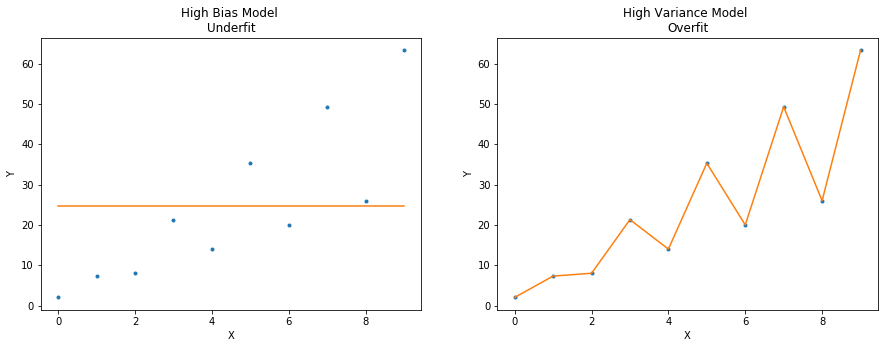

In [26]:
#Here is an example of high bias and high variance models
import numpy as np
xv = np.arange(10)
yv = np.array([2+3*i if i%2==0 else 0.3+7*i for i in xv])

f, (ax1, ax2) = plt.subplots(1,2)
f.set_size_inches((15,5))
ax1.plot(xv,yv,'.')
ax1.plot(xv,[np.mean(yv) for i in range(10)],'-')
ax1.set_title("High Bias Model \nUnderfit");ax1.set_xlabel("X");ax1.set_ylabel("Y")
ax2.plot(xv,yv,'.')
ax2.plot(xv,yv,'-')
ax2.set_title("High Variance Model \nOverfit");ax2.set_xlabel("X");ax2.set_ylabel("Y")
plt.show()

- The high bias model is underfittig our data and is a poor model to predict our response variables. The best fit line is just the mean of the response variable.
- The high variance model is overfitting our data and will perform perfectly on our training data but will fail on new data. This is because it has modelled the training data perfectly and cannot be generalized. 